In [163]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import datetime
import scipy.stats as st 
from scipy.stats import linregress

In [164]:
#study files
team_rankings_path = "../NBA_Project/ranking.csv"
games_path = "../NBA_Project/games.csv"

In [165]:
team_ranking_df = pd.read_csv(team_rankings_path)
games_df = pd.read_csv(games_path)

In [166]:
team_ranking_df.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD
0,1610612747,0,22019,2020-03-01,West,L.A. Lakers,59,46,13,0.780,21-7,25-6
1,1610612743,0,22019,2020-03-01,West,Denver,60,41,19,0.683,24-7,17-12
2,1610612746,0,22019,2020-03-01,West,LA Clippers,60,41,19,0.683,25-6,16-13
3,1610612745,0,22019,2020-03-01,West,Houston,59,39,20,0.661,21-8,18-12
4,1610612762,0,22019,2020-03-01,West,Utah,59,37,22,0.627,21-9,16-13


In [167]:
#2018-19 season
Season_2019 = team_ranking_df[(team_ranking_df["STANDINGSDATE"] == "2019-04-10")]
Season_2019["Home_Wins"] = (np.where(Season_2019["HOME_RECORD"].str.contains("-"), Season_2019["HOME_RECORD"].str.split("-").str[0], Season_2019["HOME_RECORD"]))
Season_2019["Home_Wins"] = Season_2019["Home_Wins"].astype(float)
Season_2019["Home_Losses"] = (np.where(Season_2019["HOME_RECORD"].str.contains("-"), Season_2019["HOME_RECORD"].str.split("-").str[1], Season_2019["HOME_RECORD"]))
Season_2019["Home_Losses"] = Season_2019["Home_Losses"].astype(float)
Season_2019["Home_PCT"] = Season_2019["Home_Wins"]/(Season_2019["Home_Wins"] + Season_2019["Home_Losses"])
Season_2019["Road_Wins"] = (np.where(Season_2019["ROAD_RECORD"].str.contains("-"), Season_2019["ROAD_RECORD"].str.split("-").str[0], Season_2019["ROAD_RECORD"]))
Season_2019["Road_Losses"] = (np.where(Season_2019["ROAD_RECORD"].str.contains("-"), Season_2019["ROAD_RECORD"].str.split("-").str[1], Season_2019["ROAD_RECORD"]))
Season_2019["Road_Wins"] = Season_2019["Road_Wins"].astype(float)
Season_2019["Road_Losses"] = Season_2019["Road_Losses"].astype(float)
Season_2019["Road_PCT"] = Season_2019["Road_Wins"]/(Season_2019["Road_Wins"]+Season_2019["Road_Losses"])
Season_2019.drop(columns=["LEAGUE_ID"], inplace=True)
Season_2019.at[65689, "TEAM"]= "L.A. Clippers"
Season_2019

,TEAM_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,Home_Wins,Home_Losses,Home_PCT,Road_Wins,Road_Losses,Road_PCT
65683,1610612744,22018,2019-04-10,West,Golden State,82,57,25,0.695,30-11,27-14,30.0,11.0,0.731707,27.0,14.0,0.658537
65684,1610612743,22018,2019-04-10,West,Denver,82,54,28,0.659,34-7,20-21,34.0,7.0,0.829268,20.0,21.0,0.487805
65685,1610612745,22018,2019-04-10,West,Houston,82,53,29,0.646,31-10,22-19,31.0,10.0,0.756098,22.0,19.0,0.536585
65686,1610612757,22018,2019-04-10,West,Portland,82,53,29,0.646,32-9,21-20,32.0,9.0,0.780488,21.0,20.0,0.512195
65687,1610612762,22018,2019-04-10,West,Utah,82,50,32,0.610,29-12,21-20,29.0,12.0,0.707317,21.0,20.0,0.512195
65688,1610612760,22018,2019-04-10,West,Oklahoma City,82,49,33,0.598,27-14,22-19,27.0,14.0,0.658537,22.0,19.0,0.536585
65689,1610612746,22018,2019-04-10,West,L.A. Clippers,82,48,34,0.585,26-15,22-19,26.0,15.0,0.634146,22.0,19.0,0.536585
65690,1610612759,22018,2019-04-10,West,San Antonio,82,48,34,0.585,32-9,16-25,32.0,9.0,0.780488,16.0,25.0,0.390244
65691,1610612758,22018,2019-04-10,West,Sacramento,82,39,43,0.476,24-17,15-26,24.0,17.0,0.585366,15.0,26.0,0.365854
65692,1610612747,22018,2019-04-10,West,L.A. Lakers,82,37,45,0.451,22-19,15-26,22.0,19.0,0.536585,15.0,26.0,0.365854


In [168]:
#2017-18
Season_2018 = team_ranking_df[(team_ranking_df["STANDINGSDATE"] == "2018-04-11")]
Season_2018["Home_Wins"] = (np.where(Season_2018["HOME_RECORD"].str.contains("-"), Season_2018["HOME_RECORD"].str.split("-").str[0], Season_2018["HOME_RECORD"]))
Season_2018["Home_Losses"] = (np.where(Season_2018["HOME_RECORD"].str.contains("-"), Season_2018["HOME_RECORD"].str.split("-").str[1], Season_2018["HOME_RECORD"]))
Season_2018["Home_Wins"] = Season_2018["Home_Wins"].astype(float)
Season_2018["Home_Losses"] = Season_2018["Home_Losses"].astype(float)
Season_2018["Home_PCT"] = Season_2018["Home_Wins"]/(Season_2018["Home_Wins"]+Season_2018["Home_Losses"])
Season_2018["Road_Wins"] = (np.where(Season_2018["ROAD_RECORD"].str.contains("-"), Season_2018["ROAD_RECORD"].str.split("-").str[0], Season_2018["ROAD_RECORD"]))
Season_2018["Road_Losses"] = (np.where(Season_2018["ROAD_RECORD"].str.contains("-"), Season_2018["ROAD_RECORD"].str.split("-").str[1], Season_2018["ROAD_RECORD"]))
Season_2018["Road_Wins"] = Season_2018["Road_Wins"].astype(float)
Season_2018["Road_Losses"] = Season_2018["Road_Losses"].astype(float)
Season_2018["Road_PCT"] = Season_2018["Road_Wins"]/(Season_2018["Road_Wins"]+Season_2018["Road_Losses"])
Season_2018.drop(columns=["LEAGUE_ID"], inplace=True)
Season_2018.at[71152, "TEAM"]= "L.A. Clippers"
Season_2018

,TEAM_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,Home_Wins,Home_Losses,Home_PCT,Road_Wins,Road_Losses,Road_PCT
71143,1610612745,22017,2018-04-11,West,Houston,82,65,17,0.793,34-7,31-10,34.0,7.0,0.829268,31.0,10.0,0.756098
71144,1610612744,22017,2018-04-11,West,Golden State,82,58,24,0.707,29-12,29-12,29.0,12.0,0.707317,29.0,12.0,0.707317
71145,1610612757,22017,2018-04-11,West,Portland,82,49,33,0.598,28-13,21-20,28.0,13.0,0.682927,21.0,20.0,0.512195
71146,1610612740,22017,2018-04-11,West,New Orleans,82,48,34,0.585,24-17,24-17,24.0,17.0,0.585366,24.0,17.0,0.585366
71147,1610612760,22017,2018-04-11,West,Oklahoma City,82,48,34,0.585,27-14,21-20,27.0,14.0,0.658537,21.0,20.0,0.512195
71148,1610612762,22017,2018-04-11,West,Utah,82,48,34,0.585,28-13,20-21,28.0,13.0,0.682927,20.0,21.0,0.487805
71149,1610612750,22017,2018-04-11,West,Minnesota,82,47,35,0.573,30-11,17-24,30.0,11.0,0.731707,17.0,24.0,0.414634
71150,1610612759,22017,2018-04-11,West,San Antonio,82,47,35,0.573,33-8,14-27,33.0,8.0,0.804878,14.0,27.0,0.341463
71151,1610612743,22017,2018-04-11,West,Denver,82,46,36,0.561,31-10,15-26,31.0,10.0,0.756098,15.0,26.0,0.365854
71152,1610612746,22017,2018-04-11,West,L.A. Clippers,82,42,40,0.512,22-19,20-21,22.0,19.0,0.536585,20.0,21.0,0.487805


In [169]:
#2016-17
Season_2017 = team_ranking_df[(team_ranking_df["STANDINGSDATE"] == "2017-04-12")]
Season_2017["Home_Wins"] = (np.where(Season_2017["HOME_RECORD"].str.contains("-"), Season_2017["HOME_RECORD"].str.split("-").str[0], Season_2017["HOME_RECORD"]))
Season_2017["Home_Losses"] = (np.where(Season_2017["HOME_RECORD"].str.contains("-"), Season_2017["HOME_RECORD"].str.split("-").str[1], Season_2017["HOME_RECORD"]))
Season_2017["Home_Wins"] = Season_2017["Home_Wins"].astype(float)
Season_2017["Home_Losses"] = Season_2017["Home_Losses"].astype(float)
Season_2017["Home_PCT"] = Season_2017["Home_Wins"]/(Season_2017["Home_Wins"]+Season_2017["Home_Losses"])
Season_2017["Road_Wins"] = (np.where(Season_2017["ROAD_RECORD"].str.contains("-"), Season_2017["ROAD_RECORD"].str.split("-").str[0], Season_2017["ROAD_RECORD"]))
Season_2017["Road_Losses"] = (np.where(Season_2017["ROAD_RECORD"].str.contains("-"), Season_2017["ROAD_RECORD"].str.split("-").str[1], Season_2017["ROAD_RECORD"]))
Season_2017["Road_Wins"] = Season_2017["Road_Wins"].astype(float)
Season_2017["Road_Losses"] = Season_2017["Road_Losses"].astype(float)
Season_2017["Road_PCT"] = Season_2017["Road_Wins"]/(Season_2017["Road_Wins"]+Season_2017["Road_Losses"])
Season_2017.drop(columns=["LEAGUE_ID"], inplace=True)
Season_2017.at[76606, "TEAM"]= "L.A. Clippers"
Season_2017

,TEAM_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,Home_Wins,Home_Losses,Home_PCT,Road_Wins,Road_Losses,Road_PCT
76603,1610612744,22016,2017-04-12,West,Golden State,82,67,15,0.817,36-5,31-10,36.0,5.0,0.878049,31.0,10.0,0.756098
76604,1610612759,22016,2017-04-12,West,San Antonio,82,61,21,0.744,31-10,30-11,31.0,10.0,0.756098,30.0,11.0,0.731707
76605,1610612745,22016,2017-04-12,West,Houston,82,55,27,0.671,30-11,25-16,30.0,11.0,0.731707,25.0,16.0,0.609756
76606,1610612746,22016,2017-04-12,West,L.A. Clippers,82,51,31,0.622,29-12,22-19,29.0,12.0,0.707317,22.0,19.0,0.536585
76607,1610612762,22016,2017-04-12,West,Utah,82,51,31,0.622,29-12,22-19,29.0,12.0,0.707317,22.0,19.0,0.536585
76608,1610612760,22016,2017-04-12,West,Oklahoma City,82,47,35,0.573,28-13,19-22,28.0,13.0,0.682927,19.0,22.0,0.463415
76609,1610612763,22016,2017-04-12,West,Memphis,82,43,39,0.524,24-17,19-22,24.0,17.0,0.585366,19.0,22.0,0.463415
76610,1610612757,22016,2017-04-12,West,Portland,82,41,41,0.500,25-16,16-25,25.0,16.0,0.609756,16.0,25.0,0.390244
76611,1610612743,22016,2017-04-12,West,Denver,82,40,42,0.488,22-19,18-23,22.0,19.0,0.536585,18.0,23.0,0.439024
76612,1610612740,22016,2017-04-12,West,New Orleans,82,34,48,0.415,21-20,13-28,21.0,20.0,0.512195,13.0,28.0,0.317073


In [170]:
#2015-16
Season_2016 = team_ranking_df[(team_ranking_df["STANDINGSDATE"] == "2016-04-13")]
Season_2016["Home_Wins"] = (np.where(Season_2016["HOME_RECORD"].str.contains("-"), Season_2016["HOME_RECORD"].str.split("-").str[0], Season_2016["HOME_RECORD"]))
Season_2016["Home_Losses"] = (np.where(Season_2016["HOME_RECORD"].str.contains("-"), Season_2016["HOME_RECORD"].str.split("-").str[1], Season_2016["HOME_RECORD"]))
Season_2016["Home_Wins"] = Season_2016["Home_Wins"].astype(float)
Season_2016["Home_Losses"] = Season_2016["Home_Losses"].astype(float)
Season_2016["Home_PCT"] = Season_2016["Home_Wins"]/(Season_2016["Home_Wins"]+Season_2016["Home_Losses"])
Season_2016["Road_Wins"] = (np.where(Season_2016["ROAD_RECORD"].str.contains("-"), Season_2016["ROAD_RECORD"].str.split("-").str[0], Season_2016["ROAD_RECORD"]))
Season_2016["Road_Losses"] = (np.where(Season_2016["ROAD_RECORD"].str.contains("-"), Season_2016["ROAD_RECORD"].str.split("-").str[1], Season_2016["ROAD_RECORD"]))
Season_2016["Road_Wins"] = Season_2016["Road_Wins"].astype(float)
Season_2016["Road_Losses"] = Season_2016["Road_Losses"].astype(float)
Season_2016["Road_PCT"] = Season_2016["Road_Wins"]/(Season_2016["Road_Wins"]+Season_2016["Road_Losses"])
Season_2016.drop(columns=["LEAGUE_ID"], inplace=True)
Season_2016.at[82066, "TEAM"]= "L.A. Clippers"
Season_2016

,TEAM_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,Home_Wins,Home_Losses,Home_PCT,Road_Wins,Road_Losses,Road_PCT
82063,1610612744,22015,2016-04-13,West,Golden State,82,73,9,0.890,39-2,34-7,39.0,2.0,0.951220,34.0,7.0,0.829268
82064,1610612759,22015,2016-04-13,West,San Antonio,82,67,15,0.817,40-1,27-14,40.0,1.0,0.975610,27.0,14.0,0.658537
82065,1610612760,22015,2016-04-13,West,Oklahoma City,82,55,27,0.671,32-9,23-18,32.0,9.0,0.780488,23.0,18.0,0.560976
82066,1610612746,22015,2016-04-13,West,L.A. Clippers,82,53,29,0.646,29-12,24-17,29.0,12.0,0.707317,24.0,17.0,0.585366
82067,1610612757,22015,2016-04-13,West,Portland,82,44,38,0.537,28-13,16-25,28.0,13.0,0.682927,16.0,25.0,0.390244
82068,1610612742,22015,2016-04-13,West,Dallas,82,42,40,0.512,23-18,19-22,23.0,18.0,0.560976,19.0,22.0,0.463415
82069,1610612763,22015,2016-04-13,West,Memphis,82,42,40,0.512,26-15,16-25,26.0,15.0,0.634146,16.0,25.0,0.390244
82070,1610612745,22015,2016-04-13,West,Houston,82,41,41,0.500,23-18,18-23,23.0,18.0,0.560976,18.0,23.0,0.439024
82071,1610612762,22015,2016-04-13,West,Utah,82,40,42,0.488,24-17,16-25,24.0,17.0,0.585366,16.0,25.0,0.390244
82072,1610612743,22015,2016-04-13,West,Denver,82,33,49,0.402,18-23,15-26,18.0,23.0,0.439024,15.0,26.0,0.365854


In [171]:
#2014-15
Season_2015 = team_ranking_df[(team_ranking_df["STANDINGSDATE"] == "2015-04-15")]
Season_2015["Home_Wins"] = (np.where(Season_2015["HOME_RECORD"].str.contains("-"), Season_2015["HOME_RECORD"].str.split("-").str[0], Season_2015["HOME_RECORD"]))
Season_2015["Home_Losses"] = (np.where(Season_2015["HOME_RECORD"].str.contains("-"), Season_2015["HOME_RECORD"].str.split("-").str[1], Season_2015["HOME_RECORD"]))
Season_2015["Home_Wins"] = Season_2015["Home_Wins"].astype(float)
Season_2015["Home_Losses"] = Season_2015["Home_Losses"].astype(float)
Season_2015["Home_PCT"] = Season_2015["Home_Wins"]/(Season_2015["Home_Wins"]+Season_2015["Home_Losses"])
Season_2015["Road_Wins"] = (np.where(Season_2015["ROAD_RECORD"].str.contains("-"), Season_2015["ROAD_RECORD"].str.split("-").str[0], Season_2015["ROAD_RECORD"]))
Season_2015["Road_Losses"] = (np.where(Season_2015["ROAD_RECORD"].str.contains("-"), Season_2015["ROAD_RECORD"].str.split("-").str[1], Season_2015["ROAD_RECORD"]))
Season_2015["Road_Wins"] = Season_2015["Road_Wins"].astype(float)
Season_2015["Road_Losses"] = Season_2015["Road_Losses"].astype(float)
Season_2015["Road_PCT"] = Season_2015["Road_Wins"]/(Season_2015["Road_Wins"]+Season_2015["Road_Losses"])
Season_2015.drop(columns=["LEAGUE_ID"], inplace=True)
Season_2015

,TEAM_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,Home_Wins,Home_Losses,Home_PCT,Road_Wins,Road_Losses,Road_PCT
87523,1610612744,22014,2015-04-15,West,Golden State,82,67,15,0.817,39-2,28-13,39.0,2.0,0.951220,28.0,13.0,0.682927
87524,1610612745,22014,2015-04-15,West,Houston,82,56,26,0.683,30-11,26-15,30.0,11.0,0.731707,26.0,15.0,0.634146
87525,1610612746,22014,2015-04-15,West,L.A. Clippers,82,56,26,0.683,30-11,26-15,30.0,11.0,0.731707,26.0,15.0,0.634146
87526,1610612763,22014,2015-04-15,West,Memphis,82,55,27,0.671,31-10,24-17,31.0,10.0,0.756098,24.0,17.0,0.585366
87527,1610612759,22014,2015-04-15,West,San Antonio,82,55,27,0.671,33-8,22-19,33.0,8.0,0.804878,22.0,19.0,0.536585
87528,1610612757,22014,2015-04-15,West,Portland,82,51,31,0.622,32-9,19-22,32.0,9.0,0.780488,19.0,22.0,0.463415
87529,1610612742,22014,2015-04-15,West,Dallas,82,50,32,0.610,27-14,23-18,27.0,14.0,0.658537,23.0,18.0,0.560976
87530,1610612740,22014,2015-04-15,West,New Orleans,82,45,37,0.549,28-13,17-24,28.0,13.0,0.682927,17.0,24.0,0.414634
87531,1610612760,22014,2015-04-15,West,Oklahoma City,82,45,37,0.549,29-12,16-25,29.0,12.0,0.707317,16.0,25.0,0.390244
87532,1610612756,22014,2015-04-15,West,Phoenix,82,39,43,0.476,22-19,17-24,22.0,19.0,0.536585,17.0,24.0,0.414634


In [172]:
#2013-14
Season_2014 = team_ranking_df[(team_ranking_df["STANDINGSDATE"] == "2014-04-16")]
Season_2014["Home_Wins"] = (np.where(Season_2014["HOME_RECORD"].str.contains("-"), Season_2014["HOME_RECORD"].str.split("-").str[0], Season_2014["HOME_RECORD"]))
Season_2014["Home_Losses"] = (np.where(Season_2014["HOME_RECORD"].str.contains("-"), Season_2014["HOME_RECORD"].str.split("-").str[1], Season_2014["HOME_RECORD"]))
Season_2014["Home_Wins"] = Season_2014["Home_Wins"].astype(float)
Season_2014["Home_Losses"] = Season_2014["Home_Losses"].astype(float)
Season_2014["Home_PCT"] = Season_2014["Home_Wins"]/(Season_2014["Home_Wins"]+Season_2014["Home_Losses"])
Season_2014["Road_Wins"] = (np.where(Season_2014["ROAD_RECORD"].str.contains("-"), Season_2014["ROAD_RECORD"].str.split("-").str[0], Season_2014["ROAD_RECORD"]))
Season_2014["Road_Losses"] = (np.where(Season_2014["ROAD_RECORD"].str.contains("-"), Season_2014["ROAD_RECORD"].str.split("-").str[1], Season_2014["ROAD_RECORD"]))
Season_2014["Road_Wins"] = Season_2014["Road_Wins"].astype(float)
Season_2014["Road_Losses"] = Season_2014["Road_Losses"].astype(float)
Season_2014["Road_PCT"] = Season_2014["Road_Wins"]/(Season_2014["Road_Wins"]+Season_2014["Road_Losses"])
Season_2014.drop(columns=["LEAGUE_ID"], inplace=True)

In [173]:
#2012-13
Season_2013 = team_ranking_df[(team_ranking_df["STANDINGSDATE"] == "2013-04-17")]
Season_2013["Home_Wins"] = (np.where(Season_2019["HOME_RECORD"].str.contains("-"), Season_2013["HOME_RECORD"].str.split("-").str[0], Season_2013["HOME_RECORD"]))
Season_2013["Home_Losses"] = (np.where(Season_2019["HOME_RECORD"].str.contains("-"), Season_2013["HOME_RECORD"].str.split("-").str[1], Season_2013["HOME_RECORD"]))
Season_2013["Home_Wins"] = Season_2013["Home_Wins"].astype(float)
Season_2013["Home_Losses"] = Season_2013["Home_Losses"].astype(float)
Season_2013["Home_PCT"] = Season_2013["Home_Wins"]/(Season_2013["Home_Wins"]+Season_2013["Home_Losses"])
Season_2013["Road_Wins"] = (np.where(Season_2019["ROAD_RECORD"].str.contains("-"), Season_2013["ROAD_RECORD"].str.split("-").str[0], Season_2013["ROAD_RECORD"]))
Season_2013["Road_Losses"] = (np.where(Season_2019["ROAD_RECORD"].str.contains("-"), Season_2013["ROAD_RECORD"].str.split("-").str[1], Season_2013["ROAD_RECORD"]))
Season_2013["Road_Wins"] = Season_2013["Road_Wins"].astype(float)
Season_2013["Road_Losses"] = Season_2013["Road_Losses"].astype(float)
Season_2013["Road_PCT"] = Season_2013["Road_Wins"]/(Season_2013["Road_Wins"]+Season_2013["Road_Losses"])
Season_2013.drop(columns=["LEAGUE_ID"], inplace=True)

In [174]:
#2011-12
Season_2012 = team_ranking_df[(team_ranking_df["STANDINGSDATE"] == "2012-04-26")]
Season_2012["Home_Wins"] = (np.where(Season_2012["HOME_RECORD"].str.contains("-"), Season_2012["HOME_RECORD"].str.split("-").str[0], Season_2012["HOME_RECORD"]))
Season_2012["Home_Losses"] = (np.where(Season_2012["HOME_RECORD"].str.contains("-"), Season_2012["HOME_RECORD"].str.split("-").str[1], Season_2012["HOME_RECORD"]))
Season_2012["Home_Wins"] = Season_2012["Home_Wins"].astype(float)
Season_2012["Home_Losses"] = Season_2012["Home_Losses"].astype(float)
Season_2012["Home_PCT"] = Season_2012["Home_Wins"]/(Season_2012["Home_Wins"]+Season_2012["Home_Losses"])
Season_2012["Road_Wins"] = (np.where(Season_2012["ROAD_RECORD"].str.contains("-"), Season_2012["ROAD_RECORD"].str.split("-").str[0], Season_2012["ROAD_RECORD"]))
Season_2012["Road_Losses"] = (np.where(Season_2012["ROAD_RECORD"].str.contains("-"), Season_2012["ROAD_RECORD"].str.split("-").str[1], Season_2012["ROAD_RECORD"]))
Season_2012["Road_Wins"] = Season_2012["Road_Wins"].astype(float)
Season_2012["Road_Losses"] = Season_2012["Road_Losses"].astype(float)
Season_2012["Road_PCT"] = Season_2012["Road_Wins"]/(Season_2012["Road_Wins"]+Season_2012["Road_Losses"])
Season_2012.drop(columns=["LEAGUE_ID"], inplace=True)

In [175]:
#2010-11
Season_2011 = team_ranking_df[(team_ranking_df["STANDINGSDATE"] == "2011-04-13")]
Season_2011["Home_Wins"] = (np.where(Season_2011["HOME_RECORD"].str.contains("-"), Season_2011["HOME_RECORD"].str.split("-").str[0], Season_2011["HOME_RECORD"]))
Season_2011["Home_Losses"] = (np.where(Season_2011["HOME_RECORD"].str.contains("-"), Season_2011["HOME_RECORD"].str.split("-").str[1], Season_2011["HOME_RECORD"]))
Season_2011["Home_Wins"] = Season_2011["Home_Wins"].astype(float)
Season_2011["Home_Losses"] = Season_2011["Home_Losses"].astype(float)
Season_2011["Home_PCT"] = Season_2011["Home_Wins"]/(Season_2011["Home_Wins"]+Season_2011["Home_Losses"])
Season_2011["Road_Wins"] = (np.where(Season_2011["ROAD_RECORD"].str.contains("-"), Season_2011["ROAD_RECORD"].str.split("-").str[0], Season_2011["ROAD_RECORD"]))
Season_2011["Road_Losses"] = (np.where(Season_2011["ROAD_RECORD"].str.contains("-"), Season_2011["ROAD_RECORD"].str.split("-").str[1], Season_2011["ROAD_RECORD"]))
Season_2011["Road_Wins"] = Season_2011["Road_Wins"].astype(float)
Season_2011["Road_Losses"] = Season_2011["Road_Losses"].astype(float)
Season_2011["Road_PCT"] = Season_2011["Road_Wins"]/(Season_2011["Road_Wins"]+Season_2011["Road_Losses"])
Season_2011.drop(columns=["LEAGUE_ID"], inplace=True)

In [176]:
#2009-10
Season_2010 = team_ranking_df[(team_ranking_df["STANDINGSDATE"] == "2010-04-14")]
Season_2010["Home_Wins"] = (np.where(Season_2010["HOME_RECORD"].str.contains("-"), Season_2010["HOME_RECORD"].str.split("-").str[0], Season_2010["HOME_RECORD"]))
Season_2010["Home_Losses"] = (np.where(Season_2010["HOME_RECORD"].str.contains("-"), Season_2010["HOME_RECORD"].str.split("-").str[1], Season_2010["HOME_RECORD"]))
Season_2010["Home_Wins"] = Season_2010["Home_Wins"].astype(float)
Season_2010["Home_Losses"] = Season_2010["Home_Losses"].astype(float)
Season_2010["Home_PCT"] = Season_2010["Home_Wins"]/(Season_2010["Home_Wins"]+Season_2010["Home_Losses"])
Season_2010["Road_Wins"] = (np.where(Season_2010["ROAD_RECORD"].str.contains("-"), Season_2010["ROAD_RECORD"].str.split("-").str[0], Season_2010["ROAD_RECORD"]))
Season_2010["Road_Losses"] = (np.where(Season_2010["ROAD_RECORD"].str.contains("-"), Season_2010["ROAD_RECORD"].str.split("-").str[1], Season_2010["ROAD_RECORD"]))
Season_2010["Road_Wins"] = Season_2010["Road_Wins"].astype(float)
Season_2010["Road_Losses"] = Season_2010["Road_Losses"].astype(float)
Season_2010["Road_PCT"] = Season_2010["Road_Wins"]/(Season_2010["Road_Wins"]+Season_2010["Road_Losses"])
Season_2010.drop(columns=["LEAGUE_ID"], inplace=True)

In [177]:
All_Seasons = pd.concat([Season_2019, Season_2018, Season_2017, Season_2016, Season_2015, Season_2014, Season_2013, Season_2012, Season_2011, Season_2010], axis=0)
All_Seasons

,TEAM_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,Home_Wins,Home_Losses,Home_PCT,Road_Wins,Road_Losses,Road_PCT
65683,1610612744,22018,2019-04-10,West,Golden State,82,57,25,0.695,30-11,27-14,30.0,11.0,0.731707,27.0,14.0,0.658537
65684,1610612743,22018,2019-04-10,West,Denver,82,54,28,0.659,34-7,20-21,34.0,7.0,0.829268,20.0,21.0,0.487805
65685,1610612745,22018,2019-04-10,West,Houston,82,53,29,0.646,31-10,22-19,31.0,10.0,0.756098,22.0,19.0,0.536585
65686,1610612757,22018,2019-04-10,West,Portland,82,53,29,0.646,32-9,21-20,32.0,9.0,0.780488,21.0,20.0,0.512195
65687,1610612762,22018,2019-04-10,West,Utah,82,50,32,0.610,29-12,21-20,29.0,12.0,0.707317,21.0,20.0,0.512195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114938,1610612752,22009,2010-04-14,East,New York,82,29,53,0.354,18-23,11-30,18.0,23.0,0.439024,11.0,30.0,0.268293
114939,1610612765,22009,2010-04-14,East,Detroit,82,27,55,0.329,17-24,10-31,17.0,24.0,0.414634,10.0,31.0,0.243902
114940,1610612755,22009,2010-04-14,East,Philadelphia,82,27,55,0.329,12-29,15-26,12.0,29.0,0.292683,15.0,26.0,0.365854
114941,1610612764,22009,2010-04-14,East,Washington,82,26,56,0.317,15-26,11-30,15.0,26.0,0.365854,11.0,30.0,0.268293


In [178]:
#most winning seasons per team in nba and by conference
win_rec_df = All_Seasons.loc[All_Seasons["W_PCT"] > 0.5]
Team_record = win_rec_df.groupby("TEAM").count()
Team_record.drop(Team_record.columns[[0,1,2,3,4,5,6,]], axis=1, inplace=True)
Team_record.drop(Team_record.columns[[1,2,3,4,5,6,7,8]], axis=1, inplace=True)
Team_record

,W_PCT
TEAM,
Atlanta,7
Boston,8
Brooklyn,3
Charlotte,3
Chicago,6
Cleveland,5
Dallas,6
Denver,6
Detroit,1


Text(0, 0.5, 'Number of Seasons above .500')

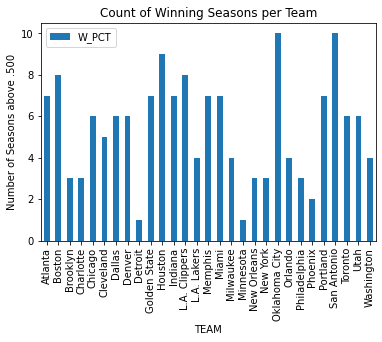

In [179]:
#Winning season count bar chart for all seasons
Team_record.plot.bar()
plt.title("Count of Winning Seasons per Team")
plt.ylabel("Number of Seasons above .500")

Text(0.5, 0.98, '')

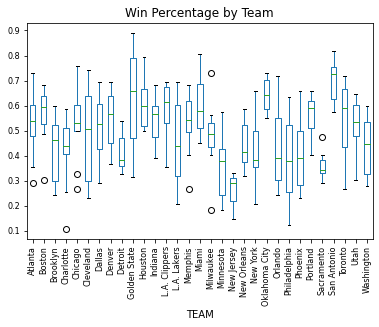

In [180]:
Win_rate = All_Seasons.boxplot(column=["W_PCT"], by="TEAM", fontsize=8, grid=False, return_type="axes")
plt.title("Win Percentage by Team")
plt.xticks(rotation=90)
plt.suptitle('')

In [181]:
# 10 Best seasons
All_Seasons.nlargest(15, "W_PCT")

,TEAM_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,Home_Wins,Home_Losses,Home_PCT,Road_Wins,Road_Losses,Road_PCT
82063,1610612744,22015,2016-04-13,West,Golden State,82,73,9,0.890,39-2,34-7,39.0,2.0,0.951220,34.0,7.0,0.829268
76603,1610612744,22016,2017-04-12,West,Golden State,82,67,15,0.817,36-5,31-10,36.0,5.0,0.878049,31.0,10.0,0.756098
82064,1610612759,22015,2016-04-13,West,San Antonio,82,67,15,0.817,40-1,27-14,40.0,1.0,0.975610,27.0,14.0,0.658537
87523,1610612744,22014,2015-04-15,West,Golden State,82,67,15,0.817,39-2,28-13,39.0,2.0,0.951220,28.0,13.0,0.682927
98443,1610612748,22012,2013-04-17,East,Miami,82,66,16,0.805,37-4,29-12,37.0,4.0,0.902439,29.0,12.0,0.707317
71143,1610612745,22017,2018-04-11,West,Houston,82,65,17,0.793,34-7,31-10,34.0,7.0,0.829268,31.0,10.0,0.756098
15555,1610612759,22011,2012-04-26,West,San Antonio,66,50,16,0.758,28-5,22-11,28.0,5.0,0.848485,22.0,11.0,0.666667
103783,1610612741,22011,2012-04-26,East,Chicago,66,50,16,0.758,26-7,24-9,26.0,7.0,0.787879,24.0,9.0,0.727273
4755,1610612759,22013,2014-04-16,West,San Antonio,82,62,20,0.756,32-9,30-11,32.0,9.0,0.780488,30.0,11.0,0.731707
109468,1610612741,22010,2011-04-13,East,Chicago,82,62,20,0.756,36-5,26-15,36.0,5.0,0.878049,26.0,15.0,0.634146


In [182]:
# 10 worst seasons
All_Seasons.nsmallest(15, "W_PCT")

,TEAM_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,Home_Wins,Home_Losses,Home_PCT,Road_Wins,Road_Losses,Road_PCT
103797,1610612766,22011,2012-04-26,East,Charlotte,66,7,59,0.106,4-29,3-30,4.0,29.0,0.121212,3.0,30.0,0.090909
170682,1610612755,22015,2016-04-13,East,Philadelphia,82,10,72,0.122,7-34,3-38,7.0,34.0,0.170732,3.0,38.0,0.073171
114942,1610612751,22009,2010-04-14,East,New Jersey,82,12,70,0.146,8-33,4-37,8.0,33.0,0.195122,4.0,37.0,0.097561
92997,1610612749,22013,2014-04-16,East,Milwaukee,82,15,67,0.183,10-31,5-36,10.0,31.0,0.243902,5.0,36.0,0.121951
26714,1610612750,22009,2010-04-14,West,Minnesota,82,15,67,0.183,10-31,5-36,10.0,31.0,0.243902,5.0,36.0,0.121951
87537,1610612750,22014,2015-04-15,West,Minnesota,82,16,66,0.195,9-32,7-34,9.0,32.0,0.219512,7.0,34.0,0.170732
154302,1610612752,22018,2019-04-10,East,New York,82,17,65,0.207,9-32,8-33,9.0,32.0,0.219512,8.0,33.0,0.195122
82077,1610612747,22015,2016-04-13,West,L.A. Lakers,82,17,65,0.207,12-29,5-36,12.0,29.0,0.292683,5.0,36.0,0.121951
176142,1610612752,22014,2015-04-15,East,New York,82,17,65,0.207,10-31,7-34,10.0,31.0,0.243902,7.0,34.0,0.170732
21254,1610612750,22010,2011-04-13,West,Minnesota,82,17,65,0.207,12-29,5-36,12.0,29.0,0.292683,5.0,36.0,0.121951


In [183]:
#Does NBA win more on the road or at home
Home = All_Seasons["Home_PCT"].mean()
Home

0.5895350455777286

In [184]:
Away = All_Seasons["Road_PCT"].mean()
Away

0.41047714954422254

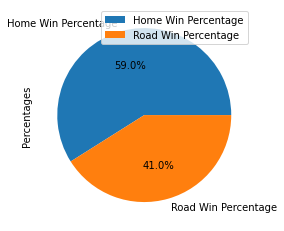

In [191]:
df = pd.DataFrame({"Percentages": [0.5895350455777286, 0.41047714954422254]}, index=["Home Win Percentage", "Road Win Percentage"])
df.plot.pie(y="Percentages", autopct="%1.1f%%")

In [192]:
#which teams win more on the road
All_Seasons.nlargest(15, "Road_Wins")

,TEAM_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,Home_Wins,Home_Losses,Home_PCT,Road_Wins,Road_Losses,Road_PCT
82063,1610612744,22015,2016-04-13,West,Golden State,82,73,9,0.890,39-2,34-7,39.0,2.0,0.951220,34.0,7.0,0.829268
71143,1610612745,22017,2018-04-11,West,Houston,82,65,17,0.793,34-7,31-10,34.0,7.0,0.829268,31.0,10.0,0.756098
76603,1610612744,22016,2017-04-12,West,Golden State,82,67,15,0.817,36-5,31-10,36.0,5.0,0.878049,31.0,10.0,0.756098
76604,1610612759,22016,2017-04-12,West,San Antonio,82,61,21,0.744,31-10,30-11,31.0,10.0,0.756098,30.0,11.0,0.731707
4755,1610612759,22013,2014-04-16,West,San Antonio,82,62,20,0.756,32-9,30-11,32.0,9.0,0.780488,30.0,11.0,0.731707
71144,1610612744,22017,2018-04-11,West,Golden State,82,58,24,0.707,29-12,29-12,29.0,12.0,0.707317,29.0,12.0,0.707317
98443,1610612748,22012,2013-04-17,East,Miami,82,66,16,0.805,37-4,29-12,37.0,4.0,0.902439,29.0,12.0,0.707317
159749,1610612738,22017,2018-04-11,East,Boston,82,55,27,0.671,27-14,28-13,27.0,14.0,0.658537,28.0,13.0,0.682927
87523,1610612744,22014,2015-04-15,West,Golden State,82,67,15,0.817,39-2,28-13,39.0,2.0,0.951220,28.0,13.0,0.682927
21241,1610612742,22010,2011-04-13,West,Dallas,82,57,25,0.695,29-12,28-13,29.0,12.0,0.707317,28.0,13.0,0.682927


In [193]:
#which team wins more at home
All_Seasons.nlargest(15, "Home_Wins")

,TEAM_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,Home_Wins,Home_Losses,Home_PCT,Road_Wins,Road_Losses,Road_PCT
82064,1610612759,22015,2016-04-13,West,San Antonio,82,67,15,0.817,40-1,27-14,40.0,1.0,0.975610,27.0,14.0,0.658537
82063,1610612744,22015,2016-04-13,West,Golden State,82,73,9,0.890,39-2,34-7,39.0,2.0,0.951220,34.0,7.0,0.829268
87523,1610612744,22014,2015-04-15,West,Golden State,82,67,15,0.817,39-2,28-13,39.0,2.0,0.951220,28.0,13.0,0.682927
10217,1610612743,22012,2013-04-17,West,Denver,82,57,25,0.695,38-3,19-22,38.0,3.0,0.926829,19.0,22.0,0.463415
98443,1610612748,22012,2013-04-17,East,Miami,82,66,16,0.805,37-4,29-12,37.0,4.0,0.902439,29.0,12.0,0.707317
76603,1610612744,22016,2017-04-12,West,Golden State,82,67,15,0.817,36-5,31-10,36.0,5.0,0.878049,31.0,10.0,0.756098
21240,1610612759,22010,2011-04-13,West,San Antonio,82,61,21,0.744,36-5,25-16,36.0,5.0,0.878049,25.0,16.0,0.609756
109468,1610612741,22010,2011-04-13,East,Chicago,82,62,20,0.756,36-5,26-15,36.0,5.0,0.878049,26.0,15.0,0.634146
176128,1610612737,22014,2015-04-15,East,Atlanta,82,60,22,0.732,35-6,25-16,35.0,6.0,0.853659,25.0,16.0,0.609756
92983,1610612754,22013,2014-04-16,East,Indiana,82,56,26,0.683,35-6,21-20,35.0,6.0,0.853659,21.0,20.0,0.512195


In [194]:
#Does the East or West win more at Home
All_Seasons[["CONFERENCE", "Home_PCT"]].groupby("CONFERENCE").mean()

,Home_PCT
CONFERENCE,
East,0.561445
West,0.617625


In [195]:
# Does the East or West win more on the road
All_Seasons[["CONFERENCE", "Road_PCT"]].groupby("CONFERENCE").mean()

,Road_PCT
CONFERENCE,
East,0.392386
West,0.428569


In [196]:
# Does the East or west have better teams?
All_Seasons[["CONFERENCE", "W"]].groupby("CONFERENCE").mean()

,W
CONFERENCE,
East,38.333333
West,42.060000


In [197]:
All_Seasons[["CONFERENCE", "W_PCT"]].groupby("CONFERENCE").mean()

,W_PCT
CONFERENCE,
East,0.476913
West,0.523073


Text(0.5, 0.98, '')

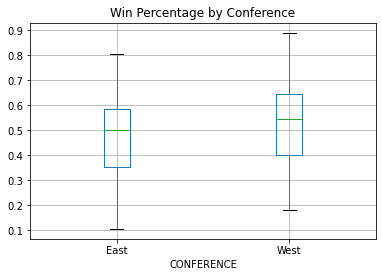

In [198]:
#Win percent by conference
All_Seasons.boxplot(column=["W_PCT"], by="CONFERENCE", return_type="axes")
plt.title("Win Percentage by Conference")
plt.suptitle('')